In [1]:
import sys
sys.path.append('/home/n31v/workspace/Fedot.Industrial')
import pandas as pd

from fedot_ind.core.architecture.postprocessing.cv_results_parser import *
from utils import *

ds_name = 'LUSC'
exp_root = '/media/n31v/data/results/' + ds_name

In [ ]:
create_mean_exps(exp_root)

In [2]:
exps = exp_list(ds_name)
svd_channel = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD channel'],
    metric='f1'
)
svd_spatial = compare_svd_results(
    baseline=exps['Baseline'],
    svd_exps=exps['SVD spatial'],
    metric='f1'
)
sfp_energy = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP energy'],
    metric='f1'
)
sfp_per = compare_sfp_results(
    baseline=exps['Baseline'],
    sfp_exps=exps['SFP percentage'],
    metric='f1'
)
best = get_best_metric(
    exp_path=exps['Baseline'],
    metric='f1'
)
print(f'best f1: {best:.3f}')

best f1: 0.887


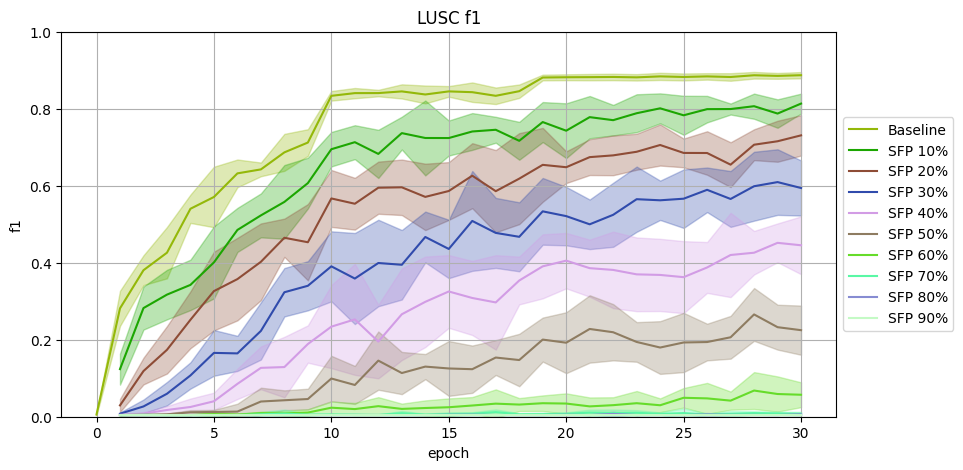

In [3]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP percentage'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

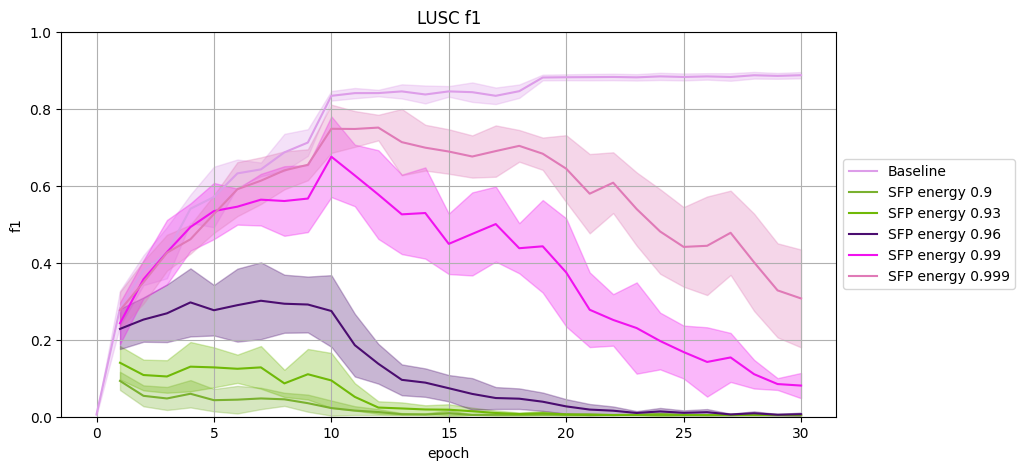

In [4]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SFP energy'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

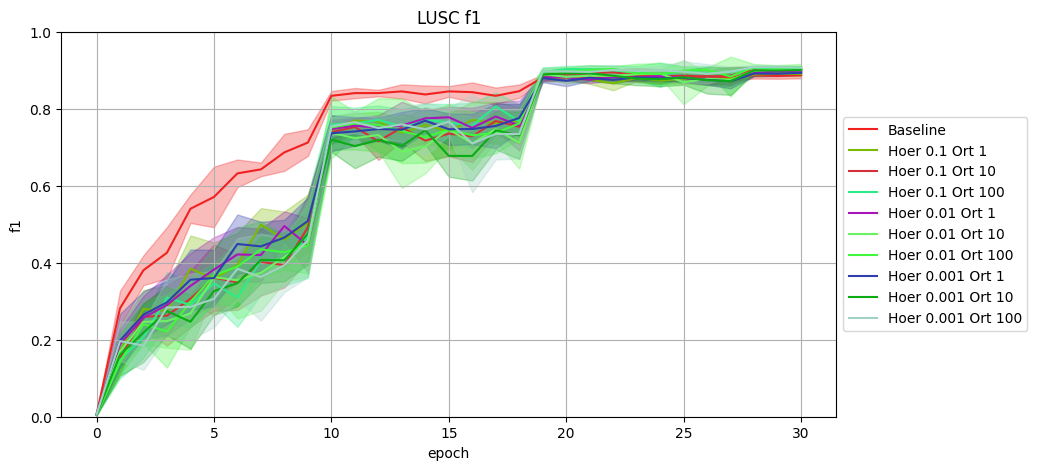

In [5]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD channel'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

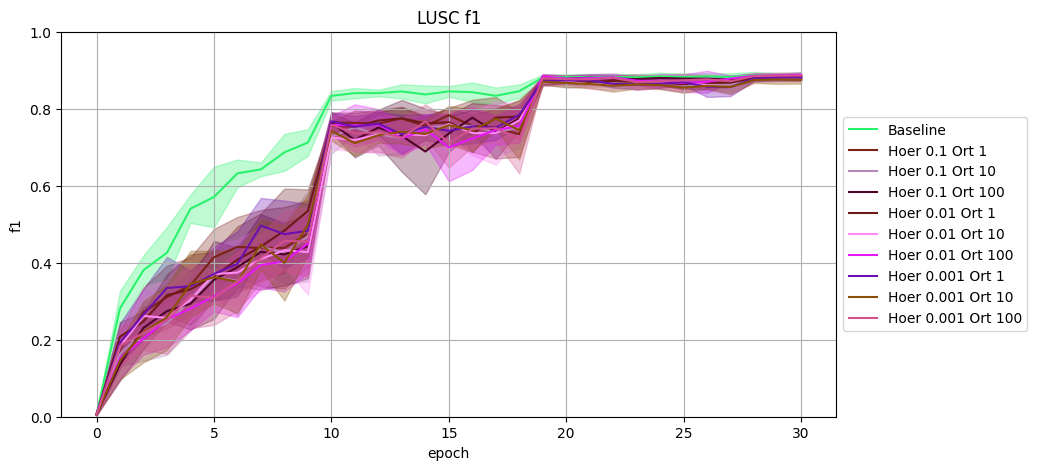

In [6]:
tmp = {'Baseline': exps['Baseline']}
tmp.update(exps['SVD spatial'])
ax = show_train_scores(
    exps=tmp,
    metric='f1',
    show_std=True,
    title=f'{ds_name} f1',
    xlabel='epoch',
    ylabel='f1',
    ylim=(0, 1),
    figsize=(10, 5),
)

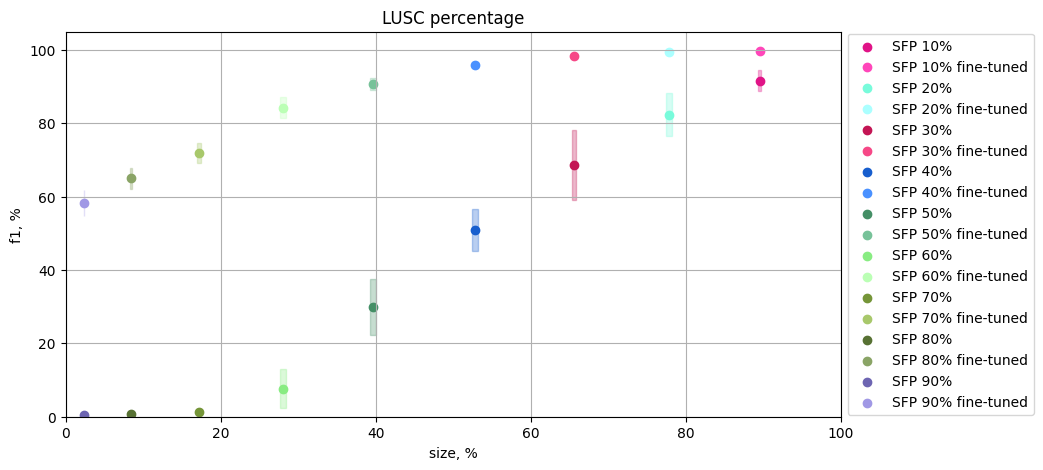

In [7]:
ax = show_sfp_results(
    sfp_exps=sfp_per,
    figsize=(10, 5),
    title=f'{ds_name} percentage',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

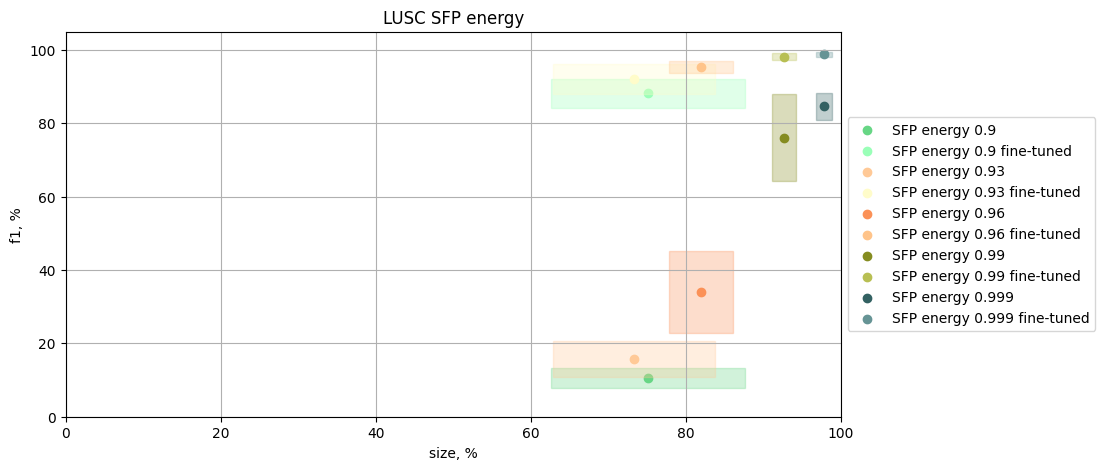

In [8]:
ax = show_sfp_results(
    sfp_exps=sfp_energy,
    figsize=(10, 5),
    title=f'{ds_name} SFP energy',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

In [9]:
channel_exps = {k: v for k, v in svd_channel.items() if 'Hoer 0.1' in k}

In [ ]:
channel_exps = {k: v for k, v in svd_channel.items() if k.endswith('Ort 100')}

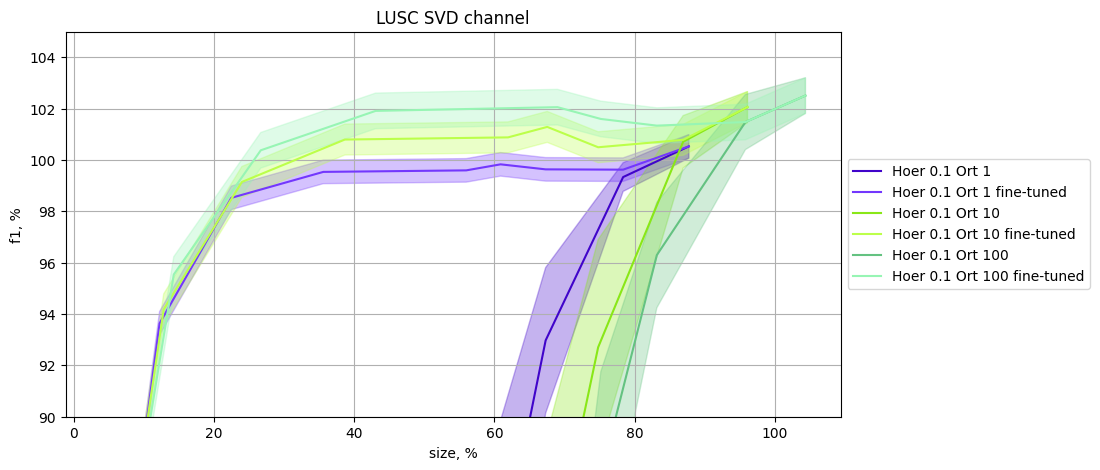

In [10]:
ax = show_svd_results(
    svd_exps=channel_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD channel',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 105),
    # xlim=(0, 100)
)

In [11]:
spatial_exps = {k: v for k, v in svd_spatial.items() if 'Hoer 0.1' in k}

In [ ]:
spatial_exps = {k: v for k, v in svd_spatial.items() if k.endswith('Ort 100')}

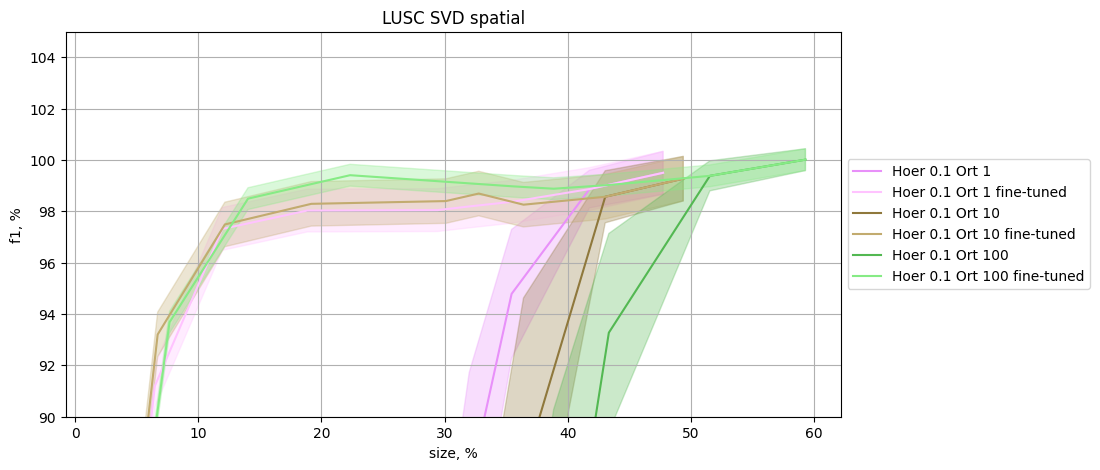

In [13]:
ax = show_svd_results(
    svd_exps=spatial_exps,
    figsize=(10, 5),
    title=f'{ds_name} SVD spatial',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(90, 105),
    # xlim=(0, 100)
)

In [3]:
best_svd = dict(channel='Hoer 0.1 Ort 100', spatial='Hoer 0.1 Ort 100')
best_channel = svd_channel[best_svd['channel']]
best_spatial = svd_spatial[best_svd['spatial']]
compare_dict = {
    "SFP percentage": sfp_per,
    "SFP energy": sfp_energy,
    "SVD channel": best_channel,
    "SVD spatial": best_spatial
}

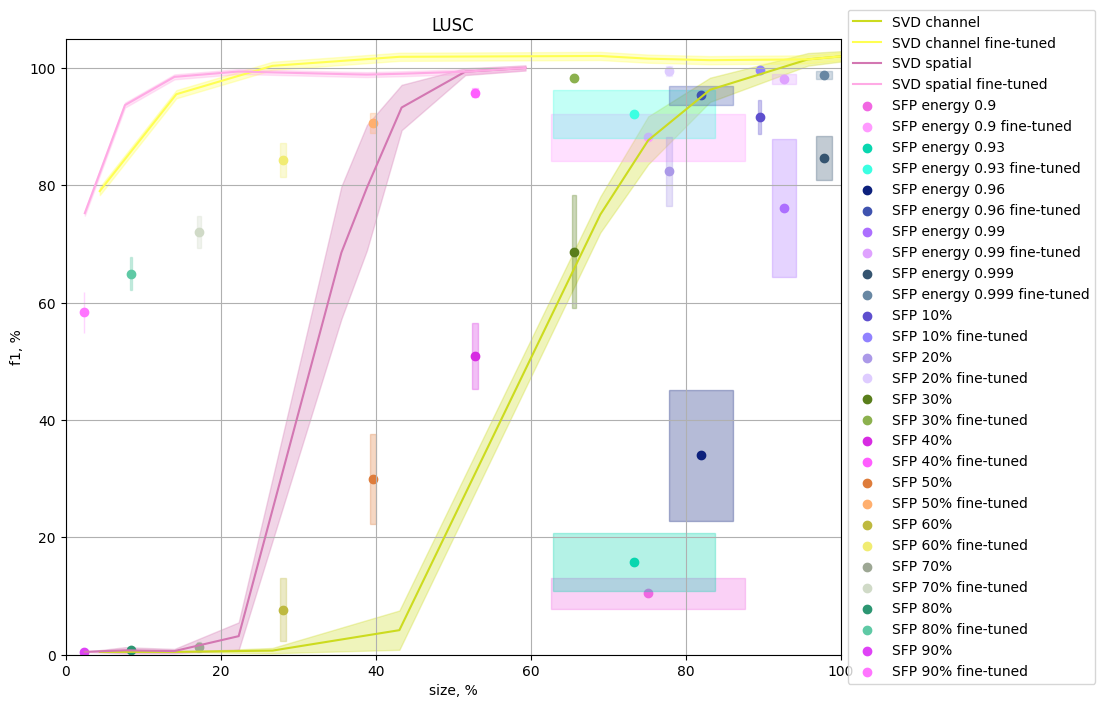

In [20]:
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([sfp_energy, sfp_per]),
    svd_exps={
        'SVD channel': best_channel,
        'SVD spatial': best_spatial,
    },
    figsize=(10, 8),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(0, 105),
    xlim=(0, 100)
)

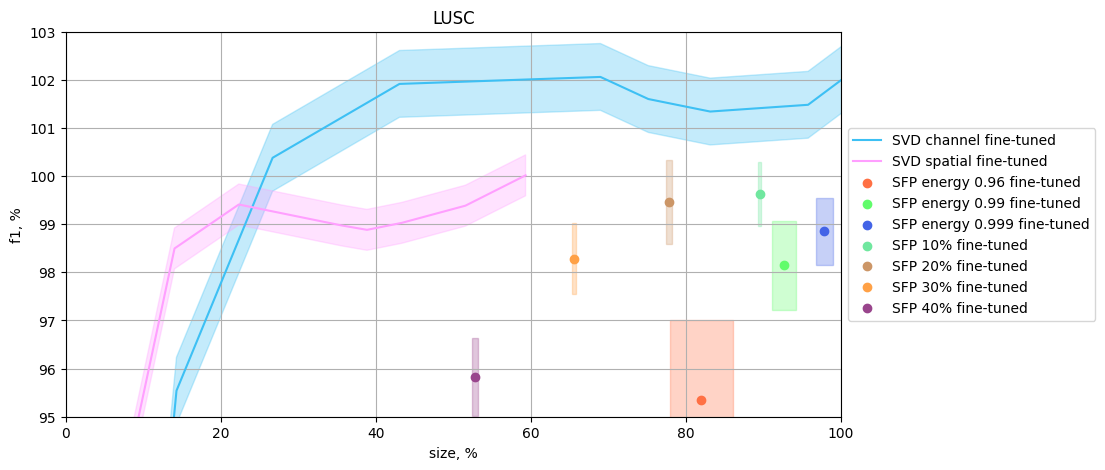

In [28]:
max_size = 100
min_f1 = 95
ax = show_svd_sfp_results(
    sfp_exps=pd.concat([
        sfp_energy.loc[sfp_energy['size']<max_size].loc[sfp_energy['fine-tuned']>min_f1],
        sfp_per.loc[sfp_per['size']<max_size].loc[sfp_per['fine-tuned']>min_f1]
    ])[['size', 'size std', 'fine-tuned', 'fine-tuned std']],
    svd_exps={
        'SVD channel': best_channel[['size', 'fine-tuned', 'fine-tuned std']],
        'SVD spatial': best_spatial[['size', 'fine-tuned', 'fine-tuned std']],
    },
    figsize=(10, 5),
    title=f'{ds_name}', # best fine-tuned',
    xlabel='size, %',
    ylabel='f1, %',
    ylim=(min_f1, 103),
    xlim=(0, max_size)
)

In [29]:
results = {}
for percent in [100, 99, 97]:
    for phase in ['pruned', 'fine-tuned']:
        results[f'{percent}% {phase}'] = {}
        for k, v in compare_dict.items():
            tmp = v.loc[v[phase]>=percent]['size']
            results[f'{percent}% {phase}'][k] = f"{tmp.min():.0f} ({tmp.idxmin() if len(tmp)>0 else ''})"
results = pd.DataFrame(results).T
results

,SFP percentage,SFP energy,SVD channel,SVD spatial
100% pruned,nan (),nan (),96 (e_0.99),59 (e_0.999)
100% fine-tuned,nan (),nan (),27 (e_0.5),59 (e_0.999)
99% pruned,nan (),nan (),96 (e_0.99),52 (e_0.99)
99% fine-tuned,78 (SFP 20%),nan (),27 (e_0.5),22 (e_0.7)
97% pruned,nan (),nan (),96 (e_0.99),52 (e_0.99)
97% fine-tuned,66 (SFP 30%),93 (SFP energy 0.99),27 (e_0.5),14 (e_0.5)


## FLOP

In [5]:
compare_df = compare_inference(
    dataset_name=ds_name,
    exps=exps,
    percent=97,
    compare_dict=compare_dict,
    best_svd=best_svd,
)
compare_df

0_0


STAGE:2023-07-18 18:30:29 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:30:33 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:30:33 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:30:34 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:30:34 3847052:384705

Baseline: 0.9369139272457548


val: 100%|██████████| 329/329 [00:06<00:00, 51.31it/s]


SVD channel one_layer: 0.9366140467854406


val: 100%|██████████| 329/329 [00:05<00:00, 62.76it/s]


SVD channel two_layers: 0.9366165757240813


val: 100%|██████████| 329/329 [00:05<00:00, 57.69it/s]


SVD channel three_layers: 0.9366140467854406


val: 100%|██████████| 329/329 [00:06<00:00, 52.70it/s]


SVD spatial one_layer: 0.9303874968464415


val: 100%|██████████| 329/329 [00:05<00:00, 62.84it/s]


SVD spatial two_layers: 0.9304714993097265


val: 100%|██████████| 329/329 [00:05<00:00, 61.91it/s]


SVD spatial three_layers: 0.9303874968464415


val: 100%|██████████| 329/329 [00:05<00:00, 62.47it/s]


SFP percentage: 0.9339093917829219


val: 100%|██████████| 329/329 [00:06<00:00, 51.58it/s]


SFP energy: 0.921120893666272
0_1


STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:35:43 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:35:43 3847052:384705

Baseline: 0.9469621598995682


val: 100%|██████████| 329/329 [00:06<00:00, 53.50it/s]


SVD channel one_layer: 0.9455950369358886


val: 100%|██████████| 329/329 [00:05<00:00, 62.98it/s]


SVD channel two_layers: 0.9455926986404398


val: 100%|██████████| 329/329 [00:05<00:00, 62.01it/s]


SVD channel three_layers: 0.9455950369358886


val: 100%|██████████| 329/329 [00:05<00:00, 56.35it/s]


SVD spatial one_layer: 0.9362475639863431


val: 100%|██████████| 329/329 [00:05<00:00, 61.93it/s]


SVD spatial two_layers: 0.9362475639863431


val: 100%|██████████| 329/329 [00:05<00:00, 64.58it/s]


SVD spatial three_layers: 0.9362475639863431


val: 100%|██████████| 329/329 [00:05<00:00, 63.38it/s]


SFP percentage: 0.9383333870856319


val: 100%|██████████| 329/329 [00:06<00:00, 53.90it/s]


SFP energy: 0.9152382504698592
1_0


STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:36:44 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:36:45 3847052:384705

Baseline: 0.9522346873769634


val: 100%|██████████| 329/329 [00:06<00:00, 52.72it/s]


SVD channel one_layer: 0.9434229551110531


val: 100%|██████████| 329/329 [00:05<00:00, 60.30it/s]


SVD channel two_layers: 0.9434229551110531


val: 100%|██████████| 329/329 [00:05<00:00, 61.80it/s]


SVD channel three_layers: 0.9434229551110531


val: 100%|██████████| 329/329 [00:06<00:00, 53.14it/s]


SVD spatial one_layer: 0.9375281487736131


val: 100%|██████████| 329/329 [00:05<00:00, 62.34it/s]


SVD spatial two_layers: 0.9375281487736131


val: 100%|██████████| 329/329 [00:05<00:00, 64.30it/s]


SVD spatial three_layers: 0.9374363758562465


val: 100%|██████████| 329/329 [00:05<00:00, 61.17it/s]


SFP percentage: 0.9221627841334407


val: 100%|██████████| 329/329 [00:06<00:00, 51.86it/s]


SFP energy: 0.9284959752711056
1_1


STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:37:47 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:37:47 3847052:384705

Baseline: 0.9479479983813228


val: 100%|██████████| 329/329 [00:05<00:00, 54.87it/s]


SVD channel one_layer: 0.9457382024158028


val: 100%|██████████| 329/329 [00:05<00:00, 62.44it/s]


SVD channel two_layers: 0.9457382024158028


val: 100%|██████████| 329/329 [00:05<00:00, 65.10it/s]


SVD channel three_layers: 0.945831834750341


val: 100%|██████████| 329/329 [00:06<00:00, 49.74it/s]


SVD spatial one_layer: 0.9315615619061897


val: 100%|██████████| 329/329 [00:05<00:00, 60.50it/s]


SVD spatial two_layers: 0.9314648351707719


val: 100%|██████████| 329/329 [00:05<00:00, 61.47it/s]


SVD spatial three_layers: 0.9314648351707719


val: 100%|██████████| 329/329 [00:05<00:00, 62.90it/s]


SFP percentage: 0.9312908833460953


val: 100%|██████████| 329/329 [00:06<00:00, 54.07it/s]


SFP energy: 0.9344764614132929
2_0


STAGE:2023-07-18 18:38:49 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:38:49 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:38:49 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:38:50 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:38:50 3847052:384705

Baseline: 0.943058885067268


val: 100%|██████████| 329/329 [00:05<00:00, 55.54it/s]


SVD channel one_layer: 0.945873051207221


val: 100%|██████████| 329/329 [00:05<00:00, 62.64it/s]


SVD channel two_layers: 0.9459652468931614


val: 100%|██████████| 329/329 [00:05<00:00, 62.72it/s]


SVD channel three_layers: 0.945873051207221


val: 100%|██████████| 329/329 [00:06<00:00, 51.30it/s]


SVD spatial one_layer: 0.9424140708065837


val: 100%|██████████| 329/329 [00:05<00:00, 63.19it/s]


SVD spatial two_layers: 0.94222228662979


val: 100%|██████████| 329/329 [00:05<00:00, 62.72it/s]


SVD spatial three_layers: 0.9423175154201389


val: 100%|██████████| 329/329 [00:05<00:00, 61.65it/s]


SFP percentage: 0.9294323637344496


val: 100%|██████████| 329/329 [00:06<00:00, 52.28it/s]


SFP energy: 0.9223219881484052
2_1


STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:39:53 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:39:53 3847052:384705

Baseline: 0.9449884823657685


val: 100%|██████████| 329/329 [00:06<00:00, 54.51it/s]


SVD channel one_layer: 0.9410661747929885


val: 100%|██████████| 329/329 [00:05<00:00, 60.79it/s]


SVD channel two_layers: 0.9410685916927171


val: 100%|██████████| 329/329 [00:05<00:00, 62.34it/s]


SVD channel three_layers: 0.9409697939536795


val: 100%|██████████| 329/329 [00:06<00:00, 51.97it/s]


SVD spatial one_layer: 0.9315942715455727


val: 100%|██████████| 329/329 [00:05<00:00, 62.74it/s]


SVD spatial two_layers: 0.9316880568814474


val: 100%|██████████| 329/329 [00:05<00:00, 58.35it/s]


SVD spatial three_layers: 0.9316880568814474


val: 100%|██████████| 329/329 [00:05<00:00, 61.57it/s]


SFP percentage: 0.9345426676930286


val: 100%|██████████| 329/329 [00:06<00:00, 49.48it/s]


SFP energy: 0.9300712377433474
3_0


STAGE:2023-07-18 18:40:56 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:40:56 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:40:56 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:40:57 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:40:57 3847052:384705

Baseline: 0.946476530819538


val: 100%|██████████| 329/329 [00:06<00:00, 54.48it/s]


SVD channel one_layer: 0.9438195575166576


val: 100%|██████████| 329/329 [00:05<00:00, 64.31it/s]


SVD channel two_layers: 0.9439124280825302


val: 100%|██████████| 329/329 [00:05<00:00, 61.58it/s]


SVD channel three_layers: 0.9439124280825302


val: 100%|██████████| 329/329 [00:06<00:00, 53.41it/s]


SVD spatial one_layer: 0.9359698907295081


val: 100%|██████████| 329/329 [00:05<00:00, 55.97it/s]


SVD spatial two_layers: 0.9359698907295081


val: 100%|██████████| 329/329 [00:05<00:00, 60.87it/s]


SVD spatial three_layers: 0.9360682904939066


val: 100%|██████████| 329/329 [00:05<00:00, 61.38it/s]


SFP percentage: 0.928265445396052


val: 100%|██████████| 329/329 [00:06<00:00, 52.31it/s]


SFP energy: 0.9274381868854101
3_1


STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:42:00 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:42:01 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:42:01 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:42:01 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:42:01 3847052:384705

Baseline: 0.9413063884959237


val: 100%|██████████| 329/329 [00:06<00:00, 52.32it/s]


SVD channel one_layer: 0.9464125312108478


val: 100%|██████████| 329/329 [00:05<00:00, 60.22it/s]


SVD channel two_layers: 0.9465042526037983


val: 100%|██████████| 329/329 [00:05<00:00, 60.93it/s]


SVD channel three_layers: 0.9465042526037983


val: 100%|██████████| 329/329 [00:06<00:00, 51.76it/s]


SVD spatial one_layer: 0.9372776646515257


val: 100%|██████████| 329/329 [00:05<00:00, 61.54it/s]


SVD spatial two_layers: 0.9371761003101837


val: 100%|██████████| 329/329 [00:05<00:00, 64.11it/s]


SVD spatial three_layers: 0.9371761003101837


val: 100%|██████████| 329/329 [00:05<00:00, 63.95it/s]


SFP percentage: 0.9307375066359844


val: 100%|██████████| 329/329 [00:06<00:00, 53.51it/s]


SFP energy: 0.9350428257750291
4_0


STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:43:04 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:43:04 3847052:384705

Baseline: 0.9442540627386122


val: 100%|██████████| 329/329 [00:06<00:00, 50.70it/s]


SVD channel one_layer: 0.9398290961977575


val: 100%|██████████| 329/329 [00:05<00:00, 58.68it/s]


SVD channel two_layers: 0.9398290961977575


val: 100%|██████████| 329/329 [00:05<00:00, 62.94it/s]


SVD channel three_layers: 0.9398290961977575


val: 100%|██████████| 329/329 [00:06<00:00, 51.71it/s]


SVD spatial one_layer: 0.936649223548668


val: 100%|██████████| 329/329 [00:05<00:00, 63.20it/s]


SVD spatial two_layers: 0.9367530980995754


val: 100%|██████████| 329/329 [00:05<00:00, 58.86it/s]


SVD spatial three_layers: 0.9366569151311085


val: 100%|██████████| 329/329 [00:05<00:00, 61.68it/s]


SFP percentage: 0.9261635970598826


val: 100%|██████████| 329/329 [00:06<00:00, 51.15it/s]


SFP energy: 0.9415637130160137
4_1


STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:311] Completed Stage: Warm Up
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:317] Completed Stage: Collection
STAGE:2023-07-18 18:44:08 3847052:3847052 ActivityProfilerController.cpp:321] Completed Stage: Post Processing
STAGE:2023-07-18 18:44:08 3847052:384705

Baseline: 0.9412919853256552


val: 100%|██████████| 329/329 [00:06<00:00, 50.00it/s]


SVD channel one_layer: 0.9444084938532178


val: 100%|██████████| 329/329 [00:05<00:00, 62.16it/s]


SVD channel two_layers: 0.9444084938532178


val: 100%|██████████| 329/329 [00:05<00:00, 62.64it/s]


SVD channel three_layers: 0.9444084938532178


val: 100%|██████████| 329/329 [00:06<00:00, 54.61it/s]


SVD spatial one_layer: 0.9330265167280539


val: 100%|██████████| 329/329 [00:05<00:00, 61.40it/s]


SVD spatial two_layers: 0.9328447731353384


val: 100%|██████████| 329/329 [00:05<00:00, 63.46it/s]


SVD spatial three_layers: 0.9330265167280539


val: 100%|██████████| 329/329 [00:05<00:00, 60.85it/s]


SFP percentage: 0.935640386870939


val: 100%|██████████| 329/329 [00:06<00:00, 51.52it/s]


SFP energy: 0.9333496334377904


,size,flop,time,f1,"size, %","flop, %","time, %","f1, %"
Baseline,44827657.0,9.957576e+10,0 days 00:00:30.804322700,0.944544,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,12004148.2,1.018750e+11,0 days 00:00:06.384587,0.943278,26.778442,102.309041,20.726270,99.866010
SVD channel two_layers,12004148.2,3.134565e+10,0 days 00:00:05.503048300,0.943306,26.778442,31.479198,17.864533,99.868968
SVD channel three_layers,12004148.2,3.180140e+10,0 days 00:00:05.483404200,0.943296,26.778442,31.936893,17.800762,99.867935
SVD spatial one_layer,6336301.8,1.014542e+11,0 days 00:00:06.427655600,0.935266,14.134805,101.886468,20.866083,99.017740
SVD spatial two_layers,6336301.8,2.137760e+10,0 days 00:00:05.519058600,0.935237,14.134805,21.468684,17.916507,99.014668
SVD spatial three_layers,6336301.8,2.242140e+10,0 days 00:00:05.478001200,0.935247,14.134805,22.516930,17.783222,99.015763
SFP percentage,29395147.4,6.469855e+10,0 days 00:00:05.468653900,0.931048,65.573687,64.974198,17.752878,98.571197
SFP energy,41536017.8,8.834236e+10,0 days 00:00:06.478447300,0.928912,92.657124,88.718744,21.030968,98.345064


In [9]:
compare_df.iloc[:, 4:]

,"size, %","flop, %","time, %","f1, %"
Baseline,100.000000,100.000000,100.000000,100.000000
SVD channel one_layer,26.778442,102.309041,20.726270,99.866010
SVD channel two_layers,26.778442,31.479198,17.864533,99.868968
SVD channel three_layers,26.778442,31.936893,17.800762,99.867935
SVD spatial one_layer,14.134805,101.886468,20.866083,99.017740
SVD spatial two_layers,14.134805,21.468684,17.916507,99.014668
SVD spatial three_layers,14.134805,22.516930,17.783222,99.015763
SFP percentage,65.573687,64.974198,17.752878,98.571197
SFP energy,92.657124,88.718744,21.030968,98.345064


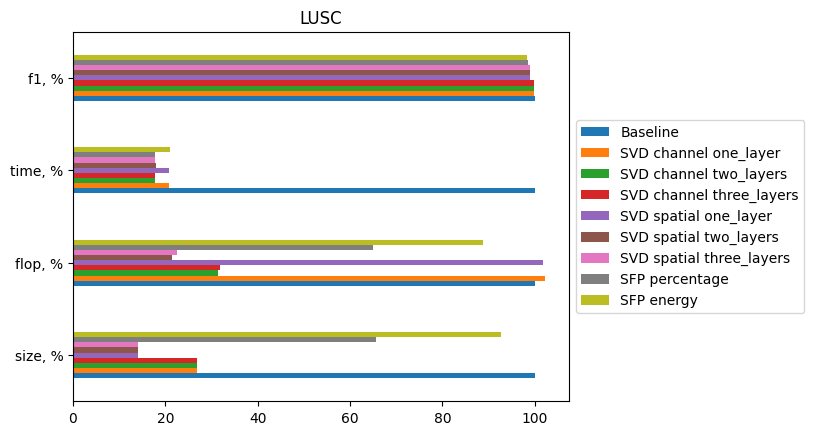

In [7]:
compare_df.iloc[:, 4:].T.plot(kind='barh', title=ds_name).legend(loc='center left', bbox_to_anchor=(1, 0.5));

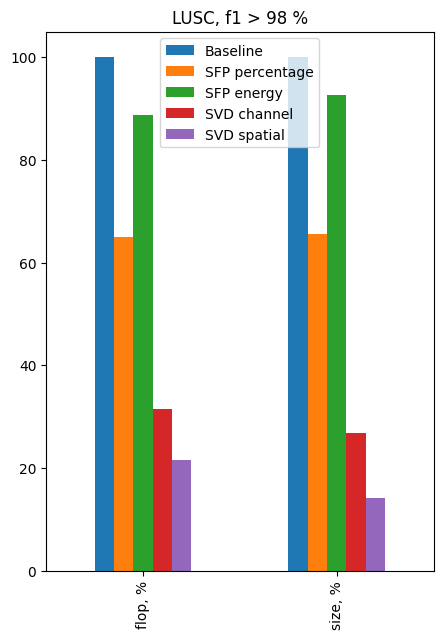

In [8]:
final_compare_df = compare_df.loc[['Baseline', 'SFP percentage', 'SFP energy'], ['flop, %', 'size, %']]
final_compare_df.loc['SVD channel', :] =  compare_df.loc['SVD channel two_layers', ['flop, %', 'size, %']]
final_compare_df.loc['SVD spatial', :] =  compare_df.loc['SVD spatial two_layers', ['flop, %', 'size, %']]
final_compare_df.T.plot(kind='bar', title=f'{ds_name}, f1 > 98 %', figsize=(5, 7));